# Word n-gram models

Let's start with downloading some books from the Gutenberg project. Then, create three lists of words from some famous works.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
print("Available books:", gutenberg.fileids())

Available books: ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/fredrik/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
word_data = [e.lower() for e in gutenberg.words(gutenberg.fileids()) if e.isalpha()]
print("%i words loaded" % len(word_data))
words = set(word_data)
print("%i unique words" % len(words))

2135400 words loaded
41487 unique words


In [6]:
print(random.choices(list(words), k=50))

['gravitate', 'abstain', 'cigars', 'prisoners', 'followeth', 'zerubbabel', 'dispensatress', 'sound', 'counts', 'inadmissibility', 'vnckle', 'tebah', 'becket', 'spiders', 'uncouthness', 'educations', 'elaboration', 'limestone', 'busie', 'circlings', 'throttle', 'insulting', 'affraide', 'unwatched', 'merrie', 'translations', 'reverberate', 'raiser', 'whaling', 'barrenness', 'relative', 'telharsa', 'nagasaki', 'chapter', 'judaea', 'sprights', 'leadballs', 'dolorous', 'leuies', 'gamming', 'whispers', 'perverseness', 'suez', 'intemperance', 'manager', 'rim', 'unscrupulous', 'faerie', 'abundance', 'throe']


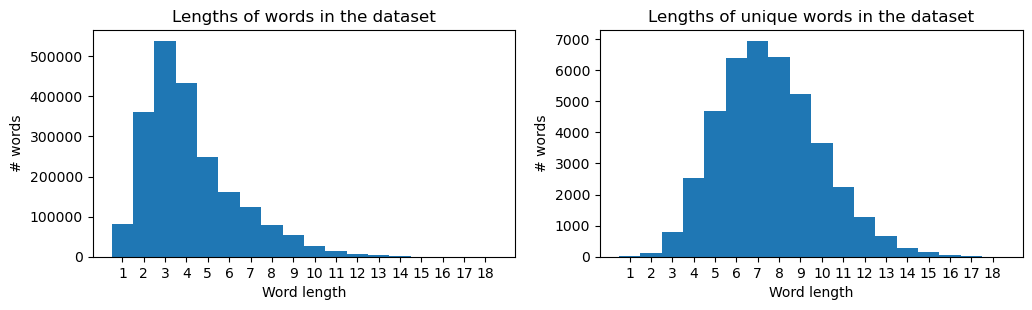

In [7]:
lengths = np.arange(1, 19)
unique_counts, _ = np.histogram([len(e) for e in words], bins=np.arange(1, 20))
counts, _ = np.histogram([len(e) for e in word_data], bins=np.arange(1, 20))


fig = plt.figure(figsize=(12, 3), dpi=100)
ax = fig.subplots(1, 2)
ax[0].bar(lengths, counts, width=1)
ax[0].set_xticks(lengths)
ax[0].set_title("Lengths of words in the dataset")
ax[0].set_xlabel("Word length")
ax[0].set_ylabel("# words")
ax[1].bar(lengths, unique_counts, width=1)
ax[1].set_xticks(lengths)
ax[1].set_title("Lengths of unique words in the dataset")
ax[1].set_xlabel("Word length")
ax[1].set_ylabel("# words")
fig.show()

## Creating a model

In [8]:
from ngram import NGramModel

In [9]:
austen_data = gutenberg.words(['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt'])
model = NGramModel(austen_data, 1)

print("Model:", model)

pred = model.predict_sequence(100)
print(" ".join(pred))

Model: 1-gram model with 11490 unique keys
that , s have , to in in then . ; suit Jane the marry I he was boastful in vulgar , disposed Weymouth correct , " favour . were She , seen could . him , said thing of sea s letters making , her her made perfectly in carry was who without and for the . in niece . Again her and fully can I let called Here " thing way The ; a sure the only passing thoughts the draw , . of ; , his to -- not They to --" . , , on satisfaction


In [10]:
def join_and_beautify(predicted_words):
    ret = str()
    i = 0
    lastword = None
    for word in predicted_words:
        if lastword in ["." , "!", "?"]:
            ret += word.capitalize()
        else:
            ret += word.lower()
        i += len(word)
        if i > 80:
            ret += '\n'
            i = 0
        else:
            ret += ' '
        lastword = word
    for s in ["!", "?", ".", ",", ";", ":"]:
        ret = ret.replace(" "+s, s)
    ret = ret.replace(" ' ", "'")
    ret = ret.replace(" i ", " I ")
    return ret

print(join_and_beautify(pred))

that, s have, to in in then.; suit jane the marry I he was boastful in vulgar, disposed weymouth correct
, " favour. Were she, seen could. Him, said thing of sea s letters making, her her made perfectly in
carry was who without and for the. In niece. Again her and fully can I let called here " thing way the
; a sure the only passing thoughts the draw,. Of;, his to -- not they to --".,, on satisfaction 


In [13]:
model = NGramModel(austen_data, 4)

print("Created a", model)
print(join_and_beautify(model.predict_sequence(300)))

Created a 4-gram model with 389276 unique keys
second, she fell on the pavement on the lower cobb, and was very sorry -- and he sat for some time nothing
of anybody who could by any chance whether grave or gay, be interesting to me; and I had told my father
, just now, which did not happen to know mrs. Ferrars at first reasonably endeavoured to dissuade
him from it, I think, must always have power to draw me out, in worse weather than to - day. Oh! What would
frank churchill say to her, to risk any thing that might be involved in a disagreement with mr. Woodhouse
. " so early too! I thought we had been safe." marianne moved to the window to take more expeditiously
the dimensions of a print, which she considered as no relationship at all, better stay in london altogether
than travel forty miles to get into it as soon as it became clear that these, their nearest relations
, an orphan from her infancy, and under the guardianship of the fir, the mountain - ash, and the two
miss coxes five;

## Shakespeare data


In [14]:
shakespeare_data = gutenberg.words(['shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt'])
model = NGramModel(shakespeare_data, 1)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(100)))

Model: 1-gram model with 8960 unique keys
away chew iealousies of,. Giue,, as, ile my macb thou flame might some prophecying of, grudge, there
we: on so the infants faining no knocke a thing marcus'our thee? Defence speake ioyntresse am you
more of an, goodnight d you time'euen let., little as golden as farewell alwayes sword after againe
these; he he the the here say my did it his haue in d. He angell a lookes I ides to then neuer soule may your
and meet manner it'


In [15]:
model = NGramModel(shakespeare_data, 4)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(300)))

Model: 4-gram model with 83491 unique keys
they that would speake with me? I will proclaime my name about the field. I am yong, but something you
may discerne of him through me, and wisedome to offer vp a weake, poore innocent lambe t'appease an
angry god macd. I beleeue, they are not ham. Nay, let'em stay heere; those that will follow cassius
, go with him, for in my way it lyes. Starres hide your fires, let not light see my black and deepe desires
: the eye winke at the hand: yet let that bee, which the eye feares, when it shall please me well. Your
master pindarus in his owne change, or by ill officers, hath giuen me this: now gather, and surmise
. The letter. To the celestiall, and my queene: may one be pardon'd being downe? Then ile looke vp,
my fault is past. But oh griefe, where hast thou beene, sister? 2. When the hurley - burley's done his
worst: nor steele, nor poyson, mallice domestique, forraine leuie, nothing, can touch him further
lady. Come on sir laer. Come on sir. They

## Bible (king james) data


In [16]:
bible_data = gutenberg.words(['bible-kjv.txt'])
model = NGramModel(bible_data, 1)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(100)))

Model: 1-gram model with 13769 unique keys
though from 17 your, lord all; unto quicken is 36 talents of about upward, doings out.:: me for. Ye
tarry pharaoh: 5 built, god came men 2 peradventure had the, the plain. Came saying behold upon. Your
: her understanding command and churches shall, the unto the way are 5 it princes, the came bought
priest woe nun is and,:: me and which then unto right will it all of: shall spake had took destroy hath
dry; the the, wilt 


In [18]:
model = NGramModel(bible_data, 3)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(300)))

Model: 3-gram model with 444686 unique keys
god. 18: 1 and jehoshaphat said, my righteousness I hold up my soul in the borders were four leprous
men at shushan assembled together to the time of the one side, yet judgment is passed to migron; at
the beginning of the ships of tarshish bringing gold, and raise me up again the captivity, whither
they be agreed? 3: 10 the lord of hosts. 19: 33 and while he yet spake, and the habitations of jacob.
20: 7 what then? Art thou come to zion unto the brook of eshcol, and refrained myself: now let your children
which have their carcases shall be servant of jesus christ our lord jesus christ, and fill thine hand
unto the voice of the land on the lord, suffer me to mine oppressors. 119: 7 he layeth up sound wisdom
and understanding, that all that he poureth water into the bed, and restore them to the lord, all ye
lands: 47 so saul took three darts in his name was belteshazzar, art thou joab? And jesus sat at meat
, neither will I spread my skirt over

In [ ]:
#bad_words_url = "https://www.cs.cmu.edu/~biglou/resources/bad-words.txt"